In [3]:
import tensorflow as tf
X = tf.Variable([[0.4,0.2,0.4]])
W = tf.Variable([[-0.5, -0.2],
                 [-0.3,  0.4],
                 [-0.5,  0.2]])
b = tf.Variable([[0.1,0.2]])
XWb = tf.matmul(X,W) + b
y = tf.nn.relu(XWb)
y_2 = tf.nn.sigmoid(XWb)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('XWb:');print(sess.run(XWb))
    print('y:');print(sess.run(y))
    print('y_2:');print(sess.run(y_2))

XWb:
[[-0.35999998  0.28      ]]
y:
[[0.   0.28]]
y_2:
[[0.41095957 0.5695462 ]]


In [11]:
import numpy as np
W = tf.Variable(tf.random_normal([3,2]))
b = tf.Variable(tf.random_normal([1,2]))
X = tf.placeholder("float", [None,3])
y = tf.nn.sigmoid(tf.matmul(X,W)+b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4,0.2,0.4],
                        [0.3,0.4,0.5],
                        [0.3, -0.4, 0.5]])
    (_b,_W,_X,_y) = sess.run((b,W,X,y),feed_dict={X:X_array})
    print('b:');print(_b)
    print('W:');print(_W)
    print('X:');print(_X)
    print('y:');print(_y)

b:
[[ 2.0259957 -2.1070166]]
W:
[[-0.5704368  -0.2644941 ]
 [ 0.78263813 -0.38475832]
 [ 1.0819311  -1.0866494 ]]
X:
[[ 0.4  0.2  0.4]
 [ 0.3  0.4  0.5]
 [ 0.3 -0.4  0.5]]
y:
[[0.9158399  0.06154734]
 [0.9375489  0.05297061]
 [0.88921773 0.07071314]]


In [5]:
ts_norm = tf.random_normal([1000])
with tf.Session() as sess:
    norm_data = ts_norm.eval()
print(norm_data[:5])

[ 1.0755508   2.057878    0.5263974  -0.78441036  0.03571361]


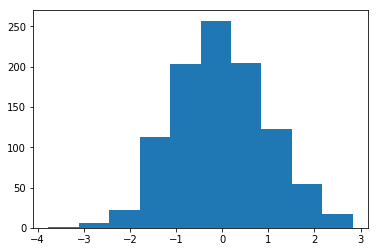

In [7]:
import matplotlib.pyplot as plt
plt.hist(norm_data)
plt.show()

In [15]:
def layer(output_dim, input_dim, inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs,W,b

In [16]:
X = tf.placeholder("float", [None,4])
h,W1,b1 = layer(output_dim=3, input_dim=4, inputs=X, activation=tf.nn.relu)
y,W2,b2 = layer(output_dim=2, input_dim=3, inputs=h)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4,0.2,0.4,0.5]])
    (layer_X,layer_h,layer_y,W1,b1,W2,b2) = sess.run((X,h,y,W1,b1,W2,b2), feed_dict={X:X_array})
    print('input Layer X:');print(layer_X)
    print('W1:');print(W1);
    print('b1:');print(b1)
    print('hidden Layer h:');print(layer_h)
    print('W2:');print(W2)
    print('b2:');print(b2)
    print('output Layer y:');print(layer_y)

input Layer X:
[[0.4 0.2 0.4 0.5]]
W1:
[[ 0.44407964  1.7706032  -0.96951914]
 [-1.2273532   0.35037014 -1.2138048 ]
 [ 0.62690836 -0.3866991   1.7461671 ]
 [-1.720358    0.78017396  1.0612004 ]]
b1:
[[ 1.3456944  -0.7240206  -0.24889418]]
hidden Layer h:
[[0.66844    0.28970206 0.34960422]]
W2:
[[-1.2793787   0.12662788]
 [ 0.77330256 -2.0036387 ]
 [-0.39872307  0.0243746 ]]
b2:
[[0.65202385 0.48678654]]
output Layer y:
[[-0.11853188 -0.00050715]]
